In [1]:
#Rodrigo Barrera
#Simple rutina que incorpora perturbaciones a la función seno y se utilizan 3 algoritmos de la librería PyOD para detectar dichas perturbaciones


In [2]:
import numpy as np
import matplotlib.pyplot as plt

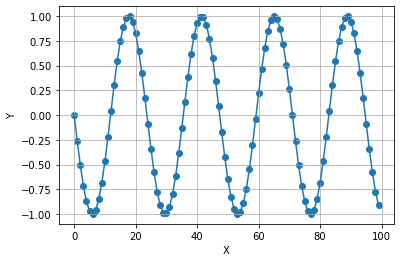

In [3]:
#Se grafica la función
X = np.arange(0,100)
Y = np.sin(50*X)

plt.plot(X,Y)
plt.scatter(X,Y)
plt.grid()
plt.ylabel('Y')
plt.xlabel('X')
plt.show()


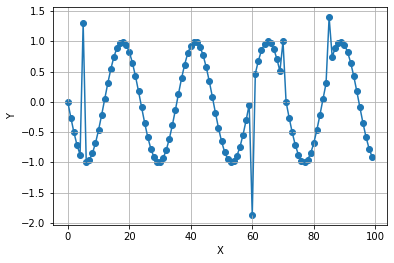

In [4]:
#Se introducen manualmente datos atípicos.
Y[5]  = 1.3
Y[60] = -1.87
Y[70] = 1
Y[85] = 1.4


plt.plot(X,Y)
plt.scatter(X,Y)
plt.grid()
plt.ylabel('Y')
plt.xlabel('X')
plt.show()


In [6]:
#Se aplica el método ROD para la detección de datos atípicos
from pyod.models.rod  import ROD
Y   = Y.reshape(-1, 1)
clf = ROD()
clf.fit(Y)
outliers = clf.predict(Y)

print(np.where(outliers==1))

(array([ 5, 17, 18, 41, 42, 65, 70, 85, 88, 89], dtype=int64),)


In [7]:
#Se aplica el método DeepSVDD para la detección de datos atípicos
from pyod.models.deep_svdd  import DeepSVDD
clf = DeepSVDD()
clf.fit(Y)
outliers1 = clf.predict(Y)

print(np.where(outliers1==1))

4/4 [==============================] - 0s 665us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_1 (Dense)             (None, 64)                64        
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 32)               0         
 bda)                                                            
                                                                 
 tf.math.pow_1 (TFOpLambda)  (None, 32)                0         
                                                                 
 tf.math.reduce_sum_1 (TFOpL  (None,)                  0         
 ambda

In [ ]:
#Se aplica el método ECOD para la detección de datos atípicos
from pyod.models.ecod  import ECOD
clf = ECOD()
clf.fit(Y)
outliers2 = clf.predict(Y)

print(np.where(outliers2==1))